# Risk assessment Model

* Predict likelihood of a loan default
* Develop a credit score for individuals based on risk levels

We will be using logistic regression for this model

**Problem statement:**

Based on the individuals data, predict whether they will default on a loan or not

**Variables and Parameters**

- We have $17$ features (independent variables) which are too many to list but some of which are:
    -  age
    -  job
    -  marital status
    -  education
- We have a target variable (dependent variable) of loan defaults.
- Regularization parameter, $\alpha$
- Vector of logistic regression parameters, $\bf{W}$
- Bias ${b}$

**Assumptions and Constraints:**
- we will assume we can split the data in to a training set and a testing set with an 80-20 split
    - assume the model score is representative of when we deploy the model
- each features is independent and each observation independent
- only consider the $6$ features in the dataset (i.e., there are no external factors)
- the data is appropriate for logistic regression
- trends in historical data will continue and there is no sudden changes (e.g., stock market doesn't crash)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
from scipy import stats
import scipy.integrate as integrate
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
bank_data = pd.read_csv("bank.csv",delimiter=";")
bank_data.shape

(4521, 17)

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank_data['default'] = bank_data['default'].map({'yes': 1, 'no': 0})
bank_data['housing'] = bank_data['housing'].map({'yes': 1, 'no': 0})
bank_data['loan'] = bank_data['loan'].map({'yes': 1, 'no': 0})
bank_data['y'] = bank_data['y'].map({'yes': 1, 'no': 0})

In [5]:
X = bank_data.iloc[:,[0,4,5,6,7,11,12,13,14]].values
y = bank_data.iloc[:,16].values

In [6]:
model = LogisticRegression(max_iter = 5000).fit(X,y)

In [7]:
model.n_iter_

array([1865], dtype=int32)

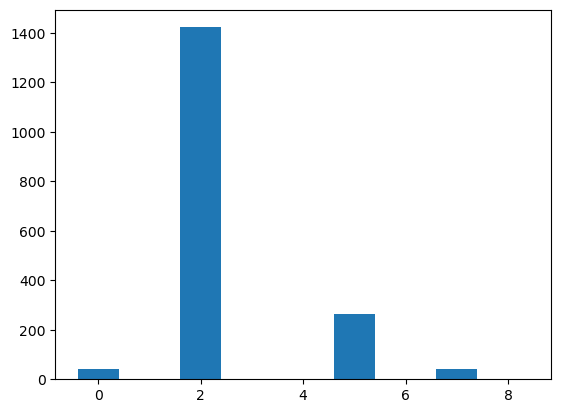

In [8]:
plt.bar(range(X.shape[1]),X.mean(axis=0))
plt.show()

In [9]:
Xs = StandardScaler().fit_transform(X)

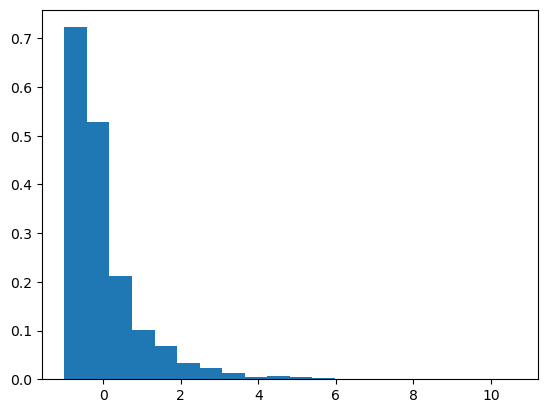

In [10]:
plt.hist(Xs[:,5],bins=20,density=True)
plt.show()

In [11]:
model = LogisticRegression(max_iter=1000).fit(Xs,y)

In [14]:
model.n_iter_

array([9], dtype=int32)

<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_1129/3873499064.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.grid(True), plt.colorbar(label='$\log_{10}(alpha)$')


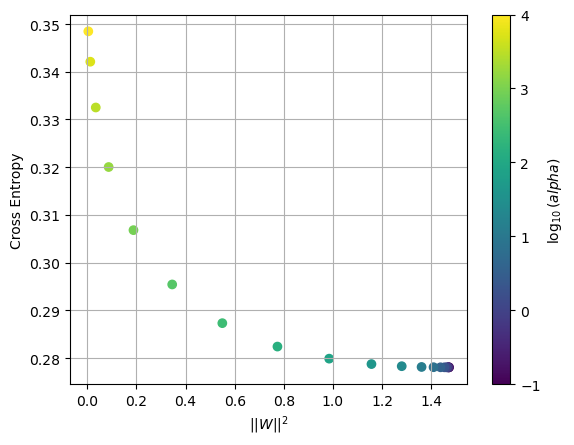

In [15]:
def costCE(W,b,X,y):
    N,p = X.shape
    W = np.array(W).reshape(p,1)
    y = np.array(y).reshape(N,1)
    S = 1/(1 + np.exp(-(X@W + b)))
    L = -1/N*np.sum(y*np.log(S) + (1 - y)*np.log(1 - S))
    return L

CEs = []
Rs = []
alphas = np.logspace(-1,4,20)
for alpha in alphas:
    model = LogisticRegression(C=1/alpha,max_iter=1000).fit(Xs,y)
    W = model.coef_
    b = model.intercept_
    CE = costCE(W,b,Xs,y)
    R = np.linalg.norm(W)**2
    CEs.append(CE)
    Rs.append(R)

plt.scatter(Rs,CEs,c=np.log10(alphas))
plt.grid(True), plt.colorbar(label='$\log_{10}(alpha)$')
plt.xlabel('$|| W ||^2$')
plt.ylabel('Cross Entropy')
plt.show()

In [16]:
a = 1/(10**1.4)
model = LogisticRegression(C=a,max_iter=1000).fit(Xs,y)
model.n_iter_

array([10], dtype=int32)

In [32]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs,y,test_size=0.4)

In [33]:
model_train = LogisticRegression(C=a,max_iter=1000).fit(Xs_train,y_train)

In [34]:
model_train.n_iter_

array([8], dtype=int32)

In [35]:
model_train.score(Xs_test,y_test)

0.8949695964621338

In [36]:
C = confusion_matrix(y_test,model_train.predict(Xs_test))

C

array([[1581,   30],
       [ 160,   38]])

In [37]:
C[1,1]/(C[1,0] + C[1,1])

0.1919191919191919

As we can see, the prediction for whether or not someone will default on their loan accurately is ~20% which is better than nothing but not great, we can see that this increases as we change the split of the train and test.

Some other ways to improve this accuracy is to use a larger data set and also consider more features.